APRENDIZAJE DEL DETECTOR DE INTRUSIONES

El software para detectar intrusiones en la red protege una red informática de usuarios no autorizados, incluidos, quizás, personas con información privilegiada. La tarea de aprendizaje del detector de intrusiones es construir un modelo predictivo (es decir, un clasificador) capaz de distinguir entre conexiones "malas", llamadas intrusiones o ataques, y conexiones normales "buenas".

El Programa de evaluación de detección de intrusiones de DARPA de 1998 fue preparado y administrado por MIT Lincoln Labs. El objetivo era relevar y evaluar la investigación en detección de intrusos. Se proporcionó un conjunto estándar de datos para auditar, que incluye una amplia variedad de intrusiones simuladas en un entorno de red militar. El concurso de detección de intrusos KDD de 1999 utiliza una versión de este conjunto de datos.

Lincoln Labs estableció un entorno para adquirir nueve semanas de datos de volcado de TCP sin procesar para una red de área local (LAN) que simula una LAN típica de la Fuerza Aérea de EE. UU. Operaron la LAN como si fuera un verdadero entorno de la Fuerza Aérea, pero la salpicaron con múltiples ataques.

Los datos de entrenamiento sin procesar eran aproximadamente cuatro gigabytes de datos de volcado TCP binarios comprimidos de siete semanas de tráfico de red. Esto se procesó en aproximadamente cinco millones de registros de conexión. Del mismo modo, las dos semanas de datos de prueba arrojaron alrededor de dos millones de registros de conexión.

Una conexión es una secuencia de paquetes TCP que comienzan y terminan en momentos bien definidos, entre los cuales los datos fluyen hacia y desde una dirección IP de origen a una dirección IP de destino bajo algún protocolo bien definido. Cada conexión se etiqueta como normal o como un ataque, con exactamente un tipo de ataque específico. Cada registro de conexión consta de unos 100 bytes.

Los ataques se dividen en cuatro categorías principales:

    DOS: denegación de servicio, por ejemplo, syn flood;
    R2L: acceso no autorizado desde una máquina remota, por ejemplo, adivinar una contraseña;
    U2R: acceso no autorizado a privilegios de superusuario local (root), por ejemplo, varios ataques de "desbordamiento de búfer";
    Sondeo: vigilancia y otros sondeos, por ejemplo, escaneo de puertos.
    
Fuente: https://kdd.ics.uci.edu/databases/kddcup99/task.html

In [1]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_kddcup99

In [3]:
X, y = fetch_kddcup99(percent10=True, download_if_missing=True, return_X_y=True)

In [4]:
X.shape

(494021, 41)

In [5]:
y.shape

(494021,)

In [6]:
dt = [('duration', int),
      ('protocol_type', 'S4'),
      ('service', 'S11'),
      ('flag', 'S6'),
      ('src_bytes', int),
      ('dst_bytes', int),
      ('land', int),
      ('wrong_fragment', int),
      ('urgent', int),
      ('hot', int),
      ('num_failed_logins', int),
      ('logged_in', int),
      ('num_compromised', int),
      ('root_shell', int),
      ('su_attempted', int),
      ('num_root', int),
      ('num_file_creations', int),
      ('num_shells', int),
      ('num_access_files', int),
      ('num_outbound_cmds', int),
      ('is_host_login', int),
      ('is_guest_login', int),
      ('count', int),
      ('srv_count', int),
      ('serror_rate', float),
      ('srv_serror_rate', float),
      ('rerror_rate', float),
      ('srv_rerror_rate', float),
      ('same_srv_rate', float),
      ('diff_srv_rate', float),
      ('srv_diff_host_rate', float),
      ('dst_host_count', int),
      ('dst_host_srv_count', int),
      ('dst_host_same_srv_rate', float),
      ('dst_host_diff_srv_rate', float),
      ('dst_host_same_src_port_rate', float),
      ('dst_host_srv_diff_host_rate', float),
      ('dst_host_serror_rate', float),
      ('dst_host_srv_serror_rate', float),
      ('dst_host_rerror_rate', float),
      ('dst_host_srv_rerror_rate', float),
      ('labels', 'S16')]

In [7]:
column_names = [c[0] for c in dt]
df_conexiones = pd.DataFrame(data=np.column_stack((X,y)),columns=column_names)

In [8]:
# df_conexiones = df_conexiones.astype(dt)
df_conexiones = df_conexiones.infer_objects()

In [9]:
df_conexiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [10]:
df_conexiones.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [11]:
df_conexiones.labels.unique()

array([b'normal.', b'buffer_overflow.', b'loadmodule.', b'perl.',
       b'neptune.', b'smurf.', b'guess_passwd.', b'pod.', b'teardrop.',
       b'portsweep.', b'ipsweep.', b'land.', b'ftp_write.', b'back.',
       b'imap.', b'satan.', b'phf.', b'nmap.', b'multihop.',
       b'warezmaster.', b'warezclient.', b'spy.', b'rootkit.'],
      dtype=object)

**Ejercicio 1**

CONSIGNA:

1. Mediante la función SelectKBest de ScikitLearn, detectar los features más relevantes del dataset provisto

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
le.fit(df_conexiones['protocol_type'])
print(le.classes_)

[b'icmp' b'tcp' b'udp']


In [14]:
df_conexiones['protocol_type_le'] = le.transform(df_conexiones['protocol_type'])

In [15]:
df_conexiones.protocol_type_le.unique()

array([1, 2, 0])

In [16]:
df_conexiones['service_le'] = le.fit_transform(df_conexiones['service'])

In [17]:
df_conexiones.service_le.unique()

array([22, 50, 17, 11,  3, 56, 18, 13, 39, 14, 40, 45, 43, 19, 48, 59, 31,
       29, 47, 20, 52, 32, 65, 10, 30, 24,  8,  7, 38, 49,  0, 37, 23, 16,
       44, 15,  5, 62, 26, 27, 12,  9, 55, 54, 25, 21,  6, 42, 53, 63, 34,
       35, 33, 51, 64,  4,  2, 28, 36, 60,  1, 61, 41, 57, 58, 46])

In [18]:
df_conexiones['flag_le'] = le.fit_transform(df_conexiones['flag'])

In [19]:
df_conexiones.flag_le.unique()

array([ 9,  6,  1,  7,  5,  8,  2,  4,  3,  0, 10])

In [20]:
di = {b'normal.': "normal", 
      b'buffer_overflow.': "buffer_overflow", 
      b'loadmodule.': "loadmodule", 
      b'perl.': "perl",
      b'neptune.': "neptune", 
      b'smurf.': "smurf", 
      b'guess_passwd.': "guess_passwd", 
      b'pod.': "pod", 
      b'teardrop.': "teardrop",
      b'portsweep.': "portsweep", 
      b'ipsweep.': "ipsweep", 
      b'land.': "land", 
      b'ftp_write.': "ftp_write", 
      b'back.': "back",
      b'imap.': "imap", 
      b'satan.': "satan", 
      b'phf.': "phf",
      b'nmap.': "nmap" ,
      b'multihop.': "multihop",
      b'warezmaster.': "warezmaster", 
      b'warezclient.': "warezclient", 
      b'spy.': "spy", 
      b'rootkit.': "rootkit"}

In [21]:
df_conexiones.replace({"labels": di}, inplace=True)

In [22]:
df_conexiones.loc[df_conexiones['labels'] == 'normal', 'labels_le'] = 1
df_conexiones.loc[df_conexiones['labels'] != 'normal', 'labels_le'] = 0

In [23]:
df_conexiones.labels_le.value_counts()

0.0    396743
1.0     97278
Name: labels_le, dtype: int64

In [24]:
df_conexiones['labels_le2'] = le.fit_transform(df_conexiones['labels'])

In [25]:
le.classes_

array(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap',
       'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap',
       'normal', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan',
       'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'],
      dtype=object)

In [26]:
df_conexiones.labels_le2.value_counts()

18    280790
9     107201
11     97278
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: labels_le2, dtype: int64

In [27]:
df_corr = df_conexiones.corr()

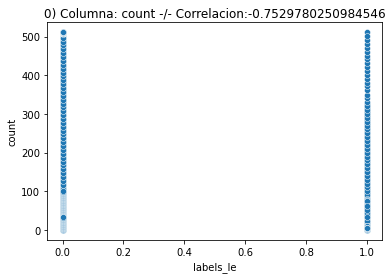

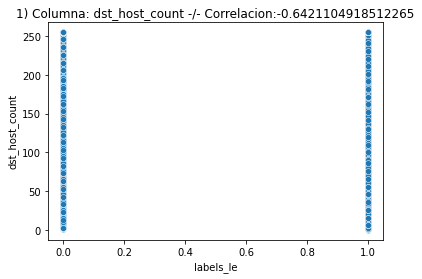

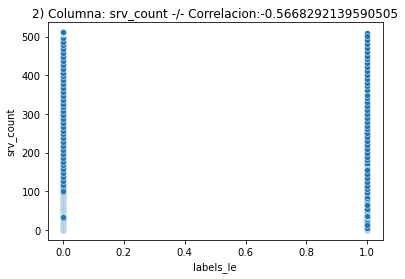

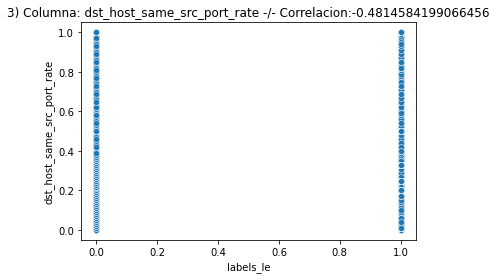

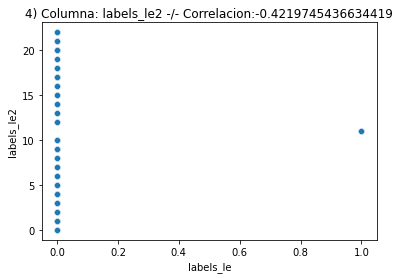

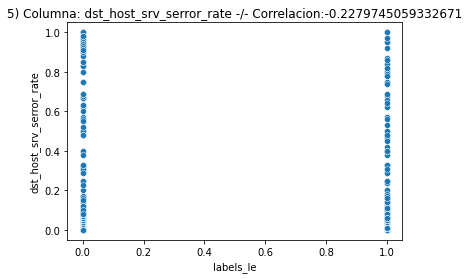

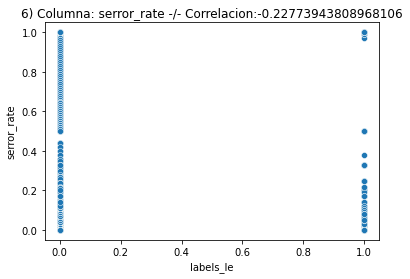

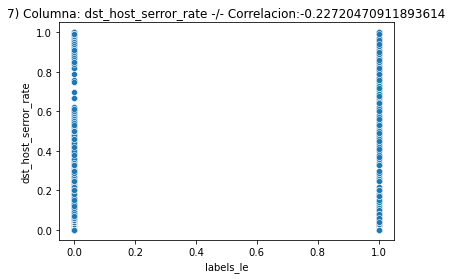

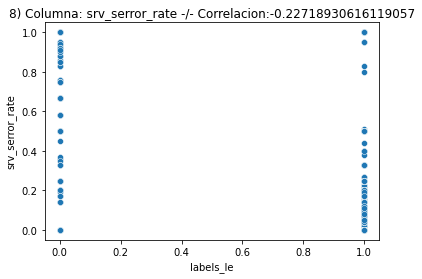

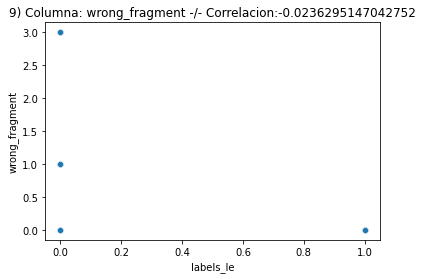

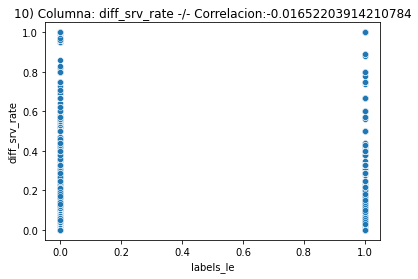

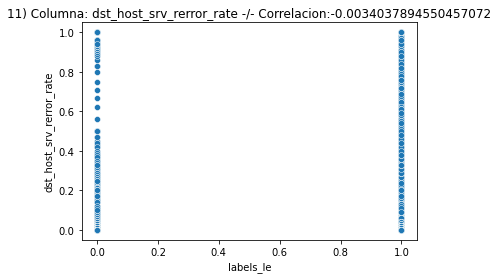

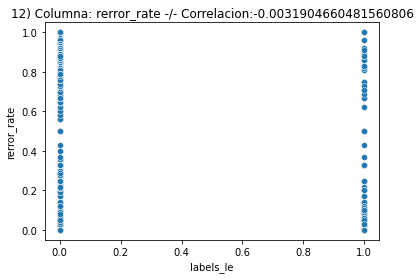

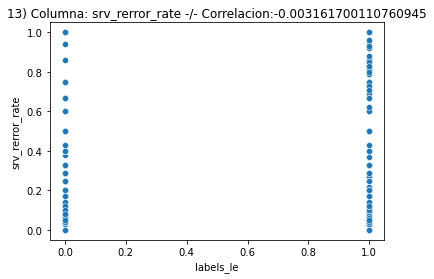

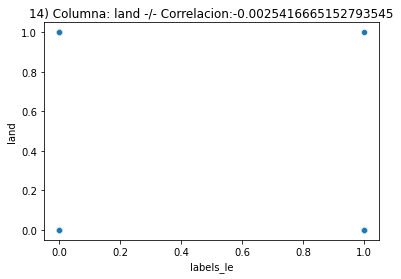

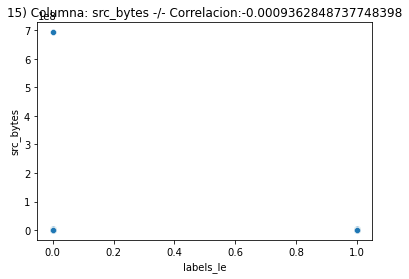

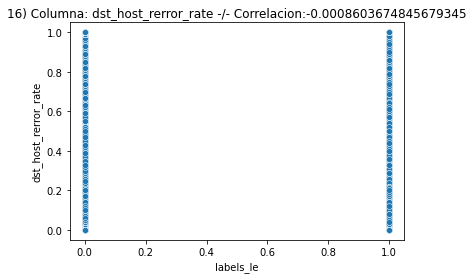

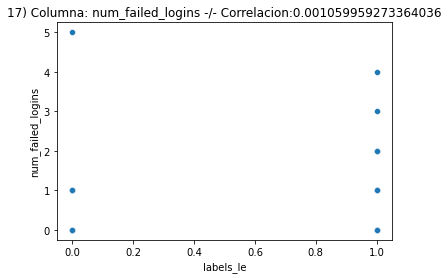

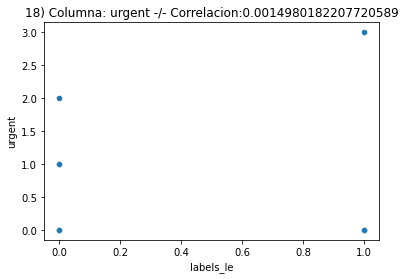

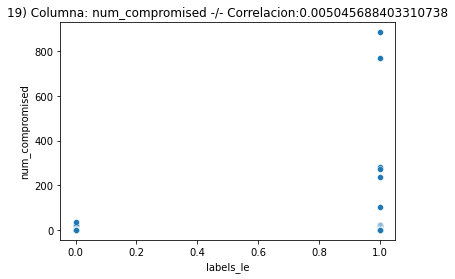

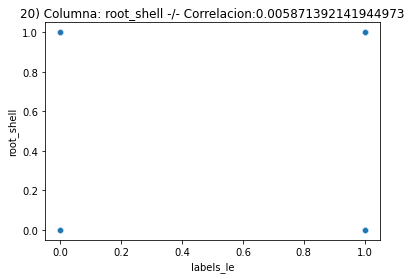

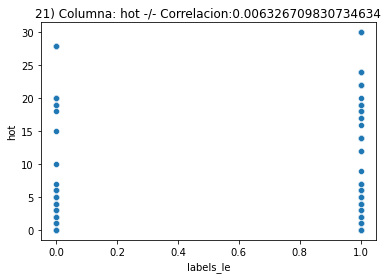

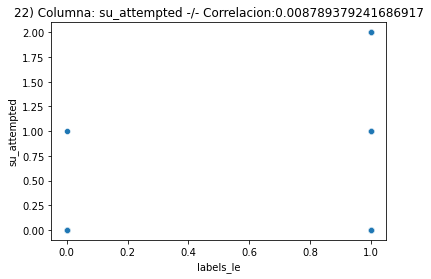

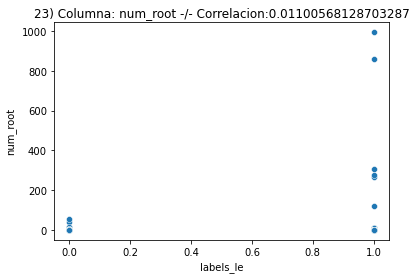

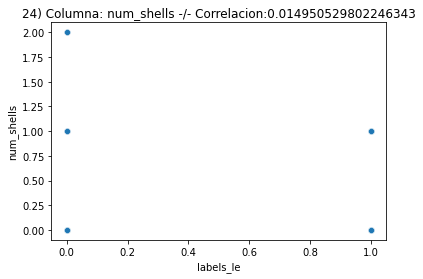

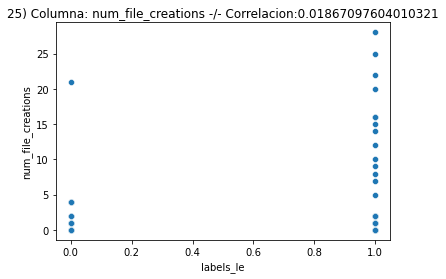

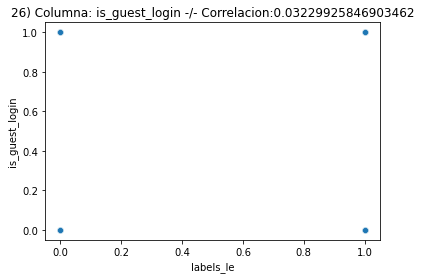

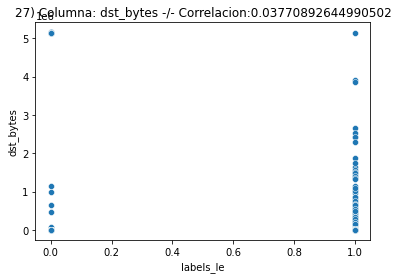

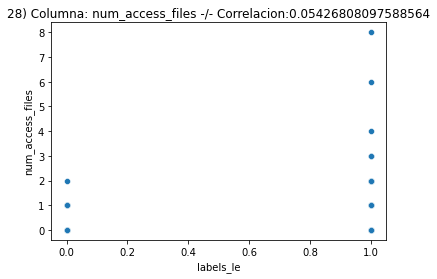

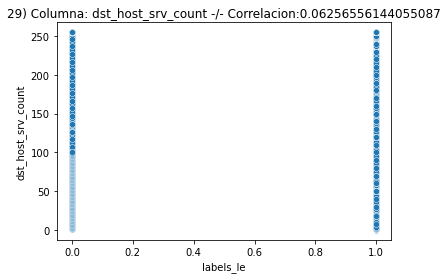

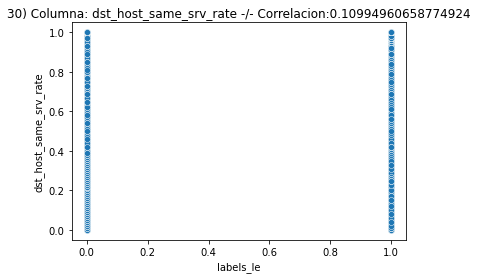

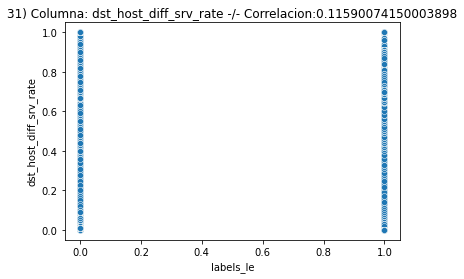

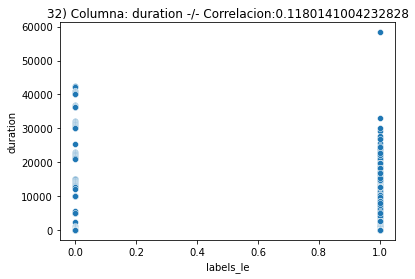

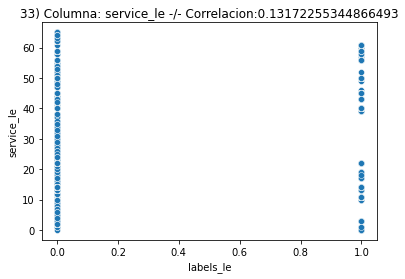

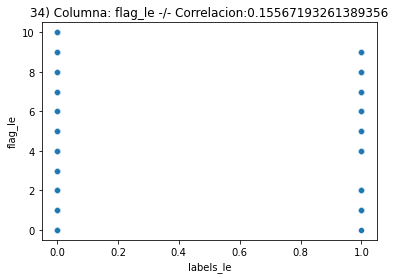

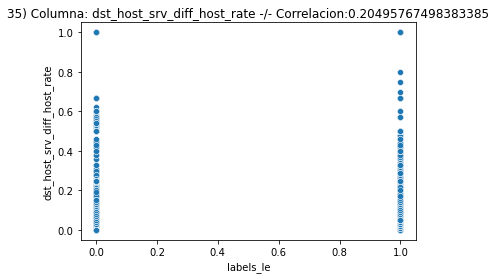

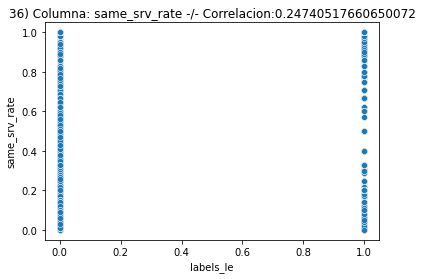

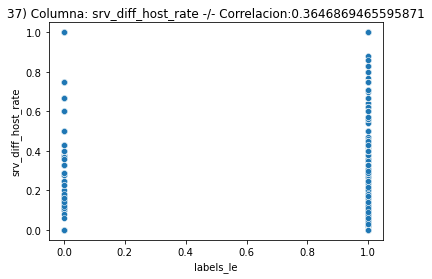

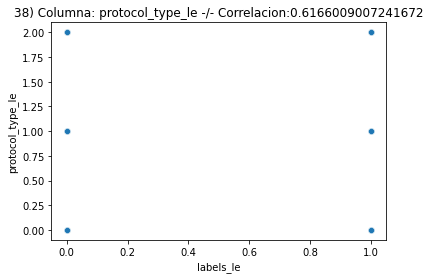

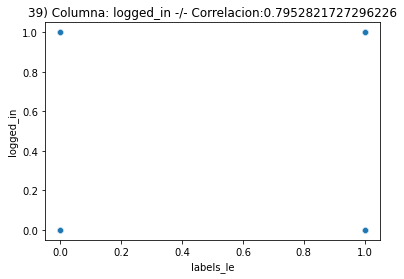

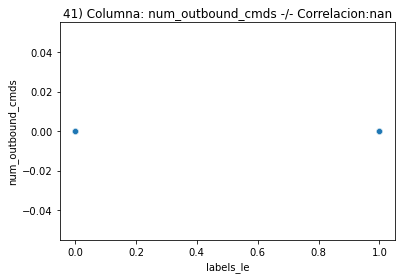

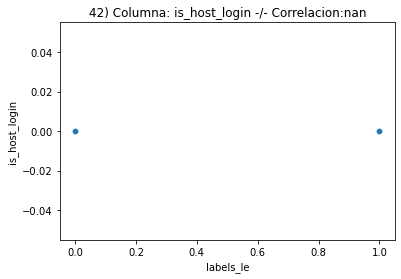

In [28]:
cols = df_corr.loc['labels_le'].sort_values(ascending=True).index
vals = df_corr.loc['labels_le'].sort_values(ascending=True).values

tam = len(vals)
i = 0
while i < tam:
    if not (vals[i] is None) and (cols[i] != 'labels_le'):
        ax = plt.axes()
        sns.scatterplot(x="labels_le", y=cols[i], data=df_conexiones[['labels_le',cols[i]]])
        titulo = str(i) + ") Columna: " + str(cols[i]) + " -/- Correlacion:" + str(vals[i])
        ax.set_title(titulo)
        plt.show()
    i+=1

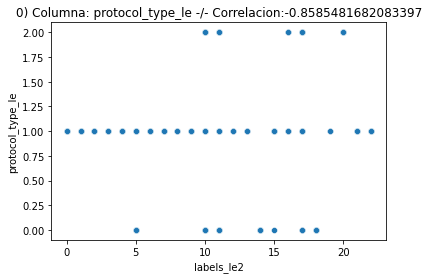

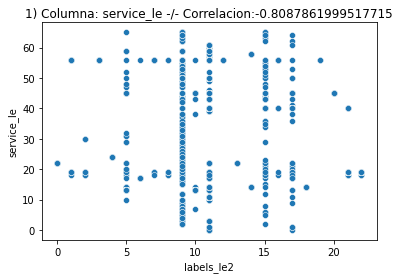

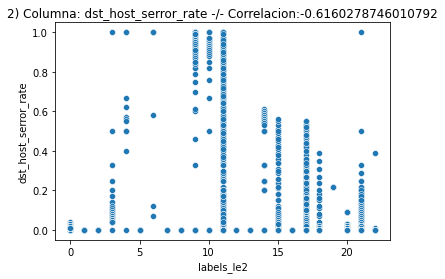

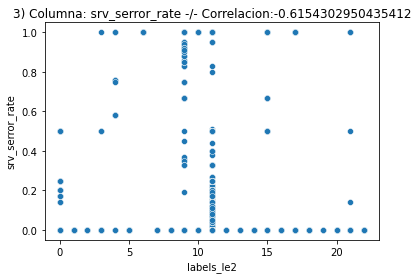

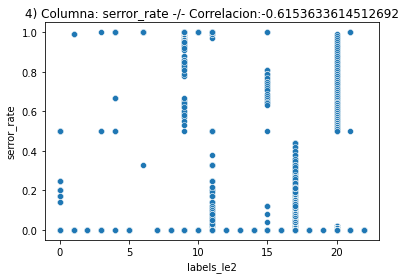

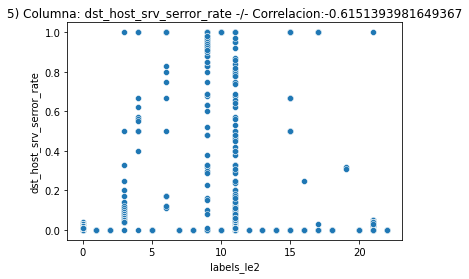

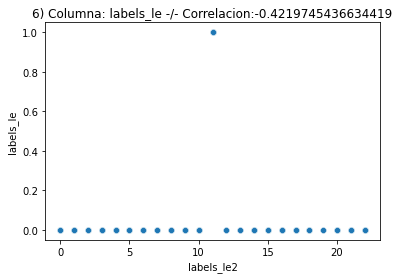

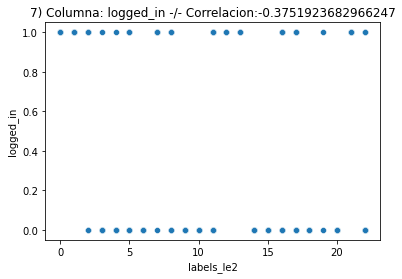

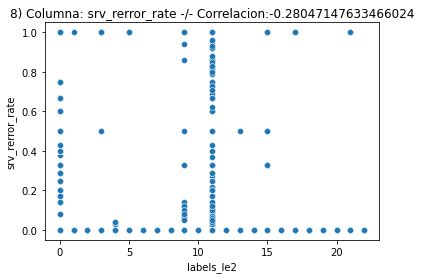

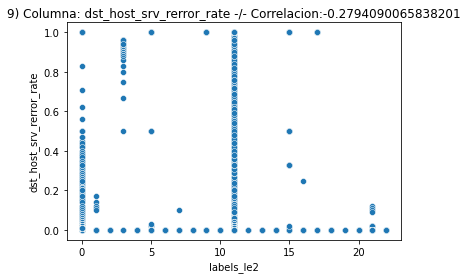

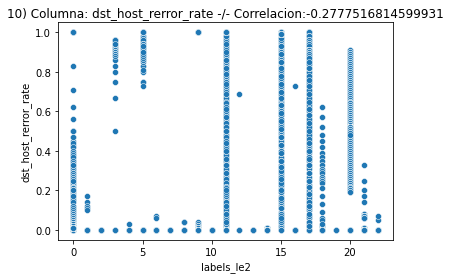

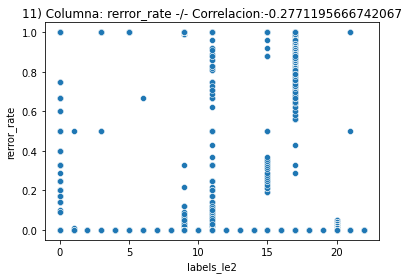

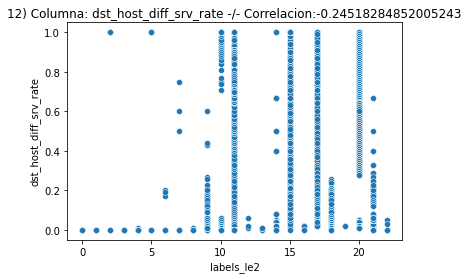

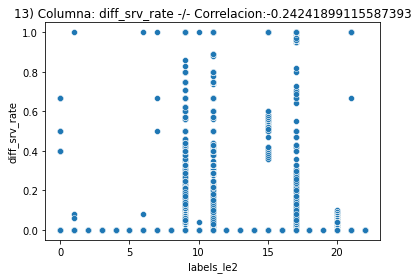

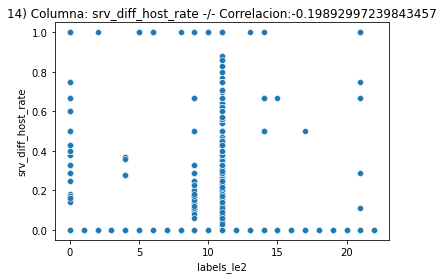

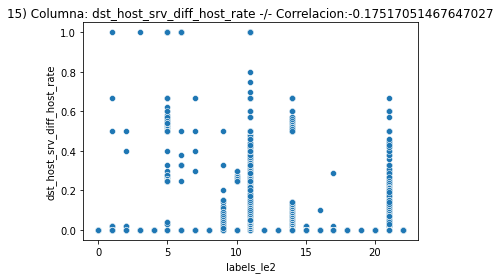

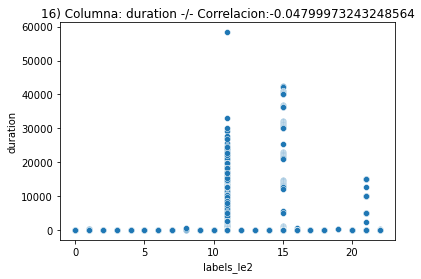

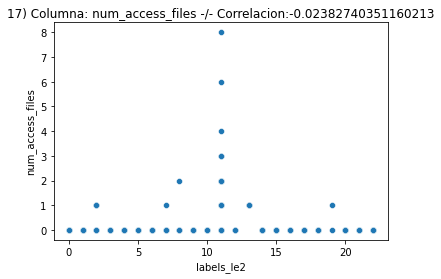

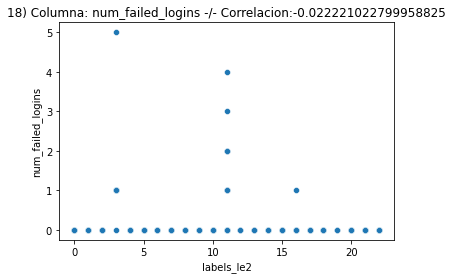

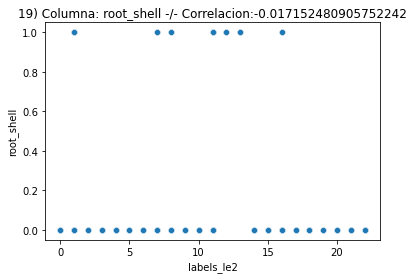

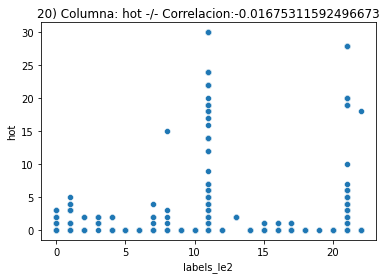

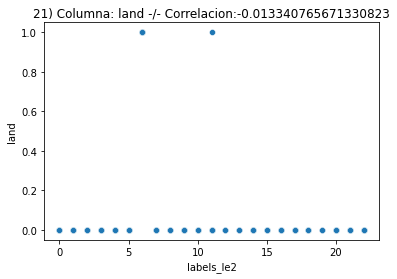

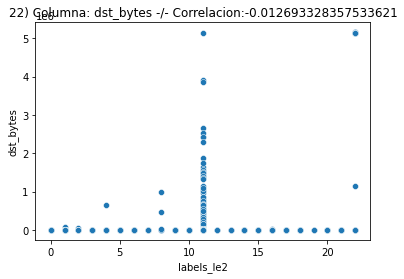

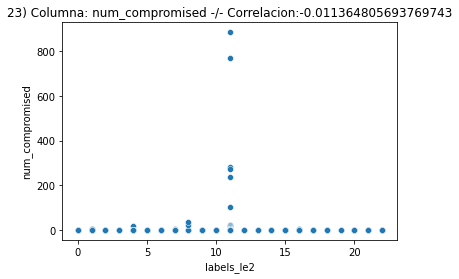

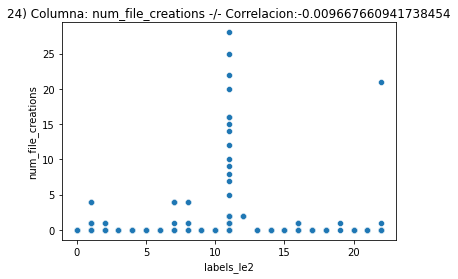

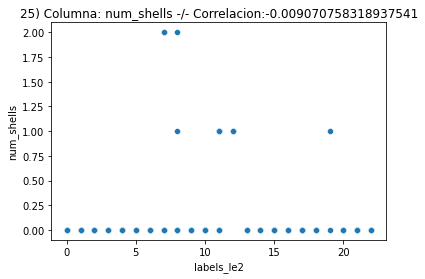

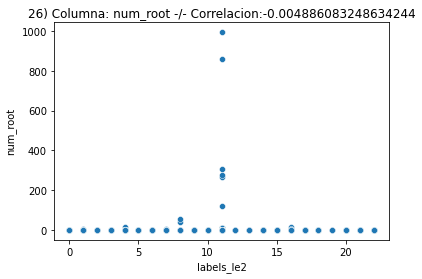

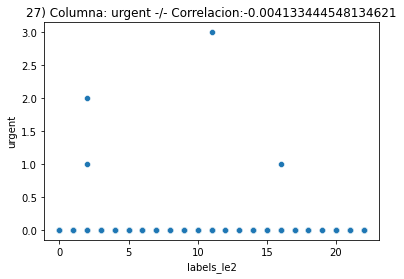

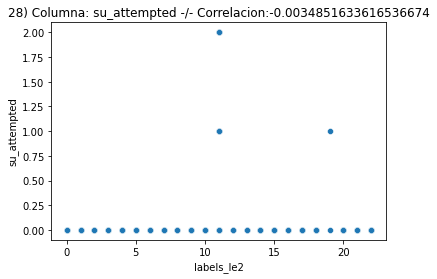

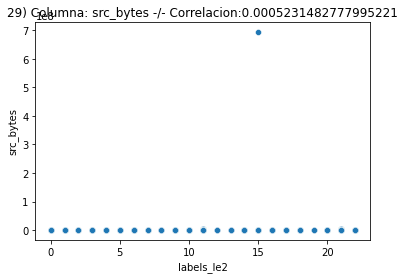

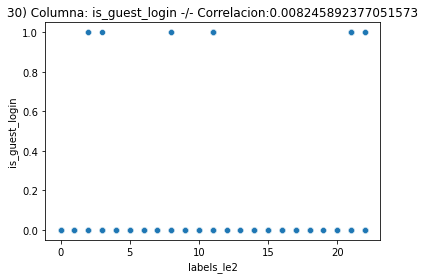

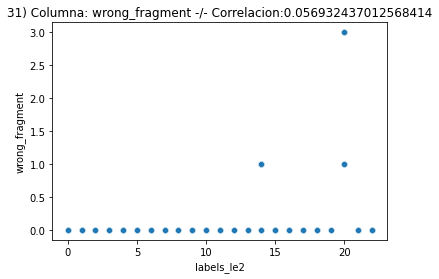

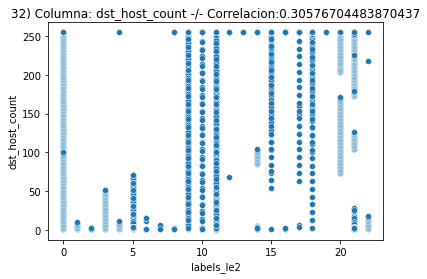

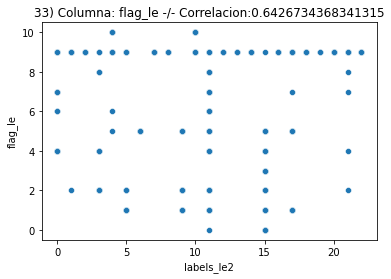

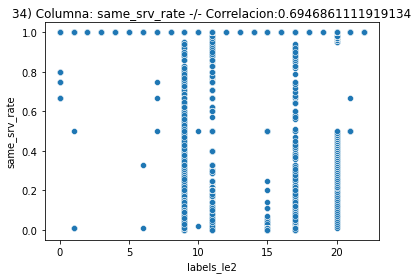

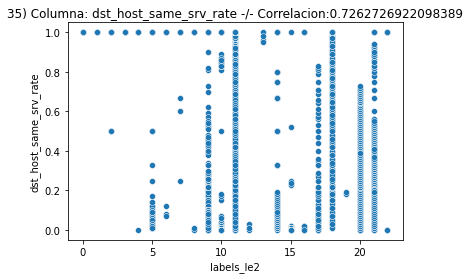

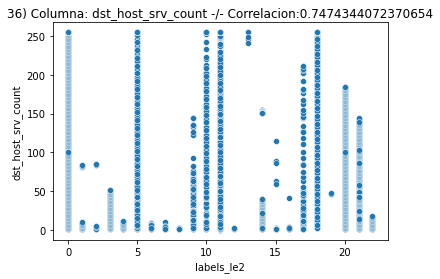

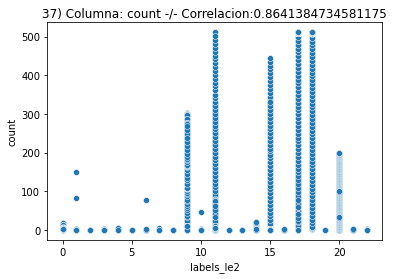

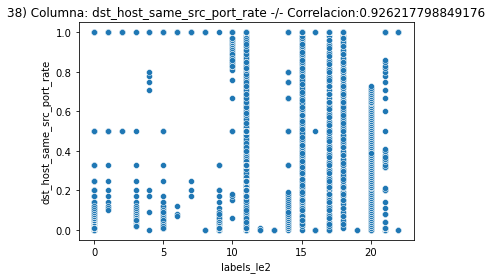

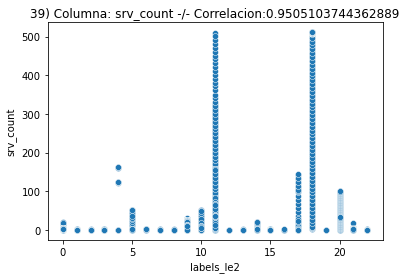

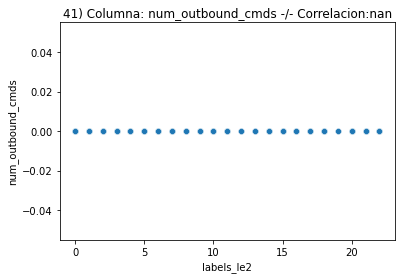

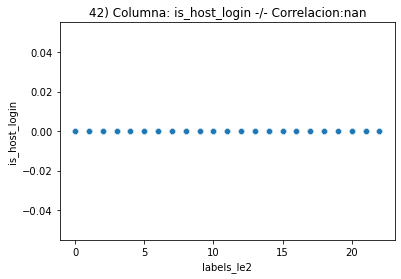

In [29]:
cols = df_corr.loc['labels_le2'].sort_values(ascending=True).index
vals = df_corr.loc['labels_le2'].sort_values(ascending=True).values

tam = len(vals)
i = 0
while i < tam:
    if not (vals[i] is None) and (cols[i] != 'labels_le2'):
        ax = plt.axes()
        sns.scatterplot(x="labels_le2", y=cols[i], data=df_conexiones[['labels_le2',cols[i]]])
        titulo = str(i) + ") Columna: " + str(cols[i]) + " -/- Correlacion:" + str(vals[i])
        ax.set_title(titulo)
        plt.show()
    i+=1

Vamos a tomar las 5 variables con mayor y menor valor de correlación:

1. count                         -0.752978
2. dst_host_count                -0.642110
3. srv_count                     -0.566829
4. dst_host_same_src_port_rate   -0.481458
5. dst_host_srv_serror_rate      -0.227975
6. dst_host_srv_diff_host_rate    0.204958
7. same_srv_rate                  0.247405
8. srv_diff_host_rate             0.364687
9. protocol_type_le               0.616601
10. logged_in                      0.795282

C:\Users\lopez\AppData\Local\Temp/ipykernel_13824/2086111003.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_upper_matrix = np.tril(np.ones(df_corr.shape)).astype(np.bool)


<AxesSubplot:>

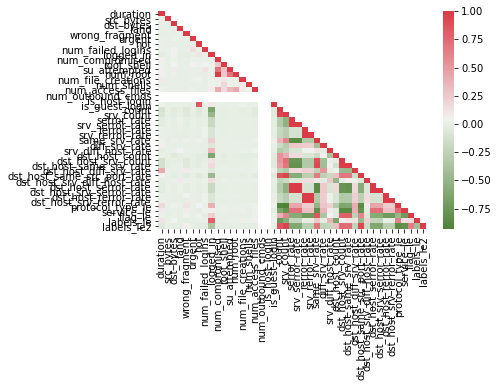

In [30]:
# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(df_corr.shape)).astype(np.bool)
df_corr = df_corr.where(bool_upper_matrix)

# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(df_corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

In [31]:
df_conexiones_corr = df_conexiones[['count','dst_host_count','srv_count','dst_host_same_src_port_rate','dst_host_srv_serror_rate','dst_host_srv_diff_host_rate','same_srv_rate','srv_diff_host_rate','protocol_type_le','logged_in', 'labels_le']]

C:\Users\lopez\AppData\Local\Temp/ipykernel_13824/1198869171.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_upper_matrix = np.tril(np.ones(df_corr.shape)).astype(np.bool)


<AxesSubplot:>

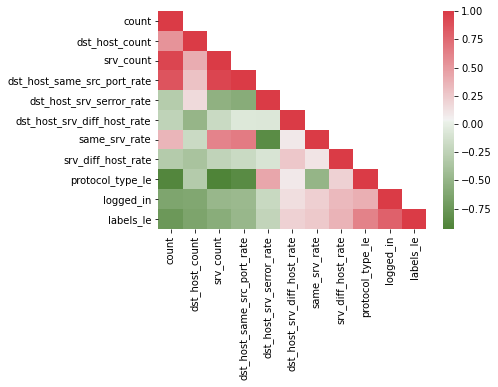

In [32]:
df_corr = df_conexiones[['count','dst_host_count','srv_count','dst_host_same_src_port_rate','dst_host_srv_serror_rate','dst_host_srv_diff_host_rate','same_srv_rate','srv_diff_host_rate','protocol_type_le','logged_in', 'labels_le']].corr()
# Quitamos el triangulo superior para facilitar la lectura
bool_upper_matrix = np.tril(np.ones(df_corr.shape)).astype(np.bool)
df_corr = df_corr.where(bool_upper_matrix)

# Utilizamos el heatmap de seaborn para visualizar
sns.heatmap(df_corr, cmap=sns.diverging_palette(120, 10, as_cmap=True),
            xticklabels=df_corr.columns.values,
            yticklabels=df_corr.columns.values)

In [33]:
df_corr

,count,dst_host_count,srv_count,dst_host_same_src_port_rate,dst_host_srv_serror_rate,dst_host_srv_diff_host_rate,same_srv_rate,srv_diff_host_rate,protocol_type_le,logged_in,labels_le
count,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_host_count,0.532632,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
srv_count,0.943667,0.401536,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_host_same_src_port_rate,0.860579,0.290747,0.944926,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dst_host_srv_serror_rate,-0.309709,0.157368,-0.529981,-0.577618,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
dst_host_srv_diff_host_rate,-0.244573,-0.491162,-0.183215,-0.064396,-0.071657,1.000000,NaN,NaN,NaN,NaN,NaN
same_srv_rate,0.353735,-0.181051,0.615566,0.660744,-0.857544,0.083454,1.000000,NaN,NaN,NaN,NaN
srv_diff_host_rate,-0.314210,-0.382389,-0.235632,-0.187881,-0.092686,0.259985,0.105393,1.000000,NaN,NaN,NaN
protocol_type_le,-0.901467,-0.317388,-0.927430,-0.861009,0.428811,0.085012,-0.505618,0.203907,1.000000,NaN,NaN
logged_in,-0.634643,-0.621029,-0.478122,-0.461558,-0.191704,0.140493,0.219685,0.330673,0.386216,1.000000,NaN


In [34]:
df_conexiones_corr = df_conexiones_corr.head(10000)

In [35]:
df_conexiones_corr.shape

(10000, 11)

In [36]:
from sklearn.feature_selection import SelectKBest

In [37]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif

In [38]:
selector = SelectKBest(mutual_info_regression, k=4)

In [39]:
X = df_conexiones_corr.drop(columns=["labels_le"])

In [40]:
y = df_conexiones_corr[['labels_le']]

In [41]:
selector.fit(X,y)

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001E160ABD790>)

In [42]:
scores = selector.scores_

In [44]:
list(X.columns)

['count',
 'dst_host_count',
 'srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_diff_host_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'protocol_type_le',
 'logged_in']

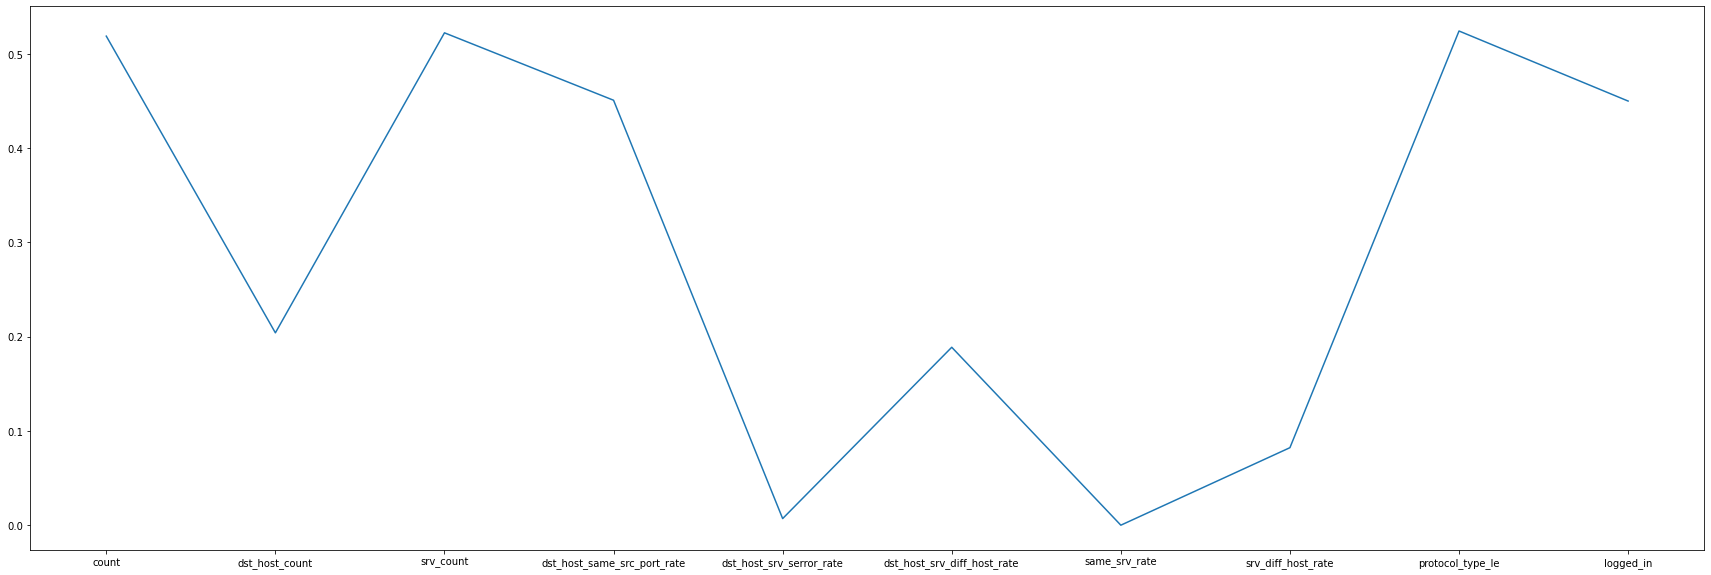

In [45]:
plt.rcParams["figure.figsize"] = [30,10]
plt.plot(scores)
plt.xticks(np.arange(10),list(X.columns));

Se puede observar que las 4 variables principalmente sugeridas son (solo tomando los primeros 10 mil registros):

1. count
2. srv_count
3. protocol_type_le
4. logged_in

Son las mas correlacionadas con la variable objetivo

**Ejercicio 2**

CONSIGNA:

1. Usando las variables más relevantes y separando los datos en "train" y "test", utilizar un árbol de decisión para realizar la predicción sobre si es una conexión normal o no:

In [46]:
#X = df_conexiones[['count','dst_host_count','srv_count','dst_host_same_src_port_rate','dst_host_srv_serror_rate','dst_host_srv_diff_host_rate','same_srv_rate','srv_diff_host_rate','protocol_type_le','logged_in']]
X = df_conexiones[['count','srv_count','logged_in','protocol_type_le','logged_in']]
y = df_conexiones[['labels_le']]

In [47]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth = 4)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [49]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [50]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = arbol.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = arbol.predict(X_test)

# Comaparamos con las etiquetas reales
print('Porcentaje de aciertos sobre el conjunto de Entrenamiento:', accuracy_score(y_train_pred,y_train))
print('Porcentaje de aciertos sobre el conjunto de Evaluación:', accuracy_score(y_test_pred,y_test))

Porcentaje de aciertos sobre el conjunto de Entrenamiento: 0.9857040200801587
Porcentaje de aciertos sobre el conjunto de Evaluación: 0.9850918475785638


[Text(0.5, 0.9, 'X[0] <= 46.5\ngini = 0.316\nsamples = 395216\nvalue = [317394, 77822]'),
 Text(0.25, 0.7, 'X[3] <= 0.5\ngini = 0.15\nsamples = 83519\nvalue = [6815, 76704]'),
 Text(0.125, 0.5, 'X[1] <= 6.5\ngini = 0.496\nsamples = 2321\nvalue = [1267, 1054]'),
 Text(0.0625, 0.3, 'X[0] <= 2.5\ngini = 0.449\nsamples = 1575\nvalue = [535, 1040]'),
 Text(0.03125, 0.1, 'gini = 0.487\nsamples = 1231\nvalue = [516, 715]'),
 Text(0.09375, 0.1, 'gini = 0.104\nsamples = 344\nvalue = [19, 325]'),
 Text(0.1875, 0.3, 'X[1] <= 7.5\ngini = 0.037\nsamples = 746\nvalue = [732, 14]'),
 Text(0.15625, 0.1, 'gini = 0.43\nsamples = 32\nvalue = [22, 10]'),
 Text(0.21875, 0.1, 'gini = 0.011\nsamples = 714\nvalue = [710, 4]'),
 Text(0.375, 0.5, 'X[4] <= 0.5\ngini = 0.127\nsamples = 81198\nvalue = [5548, 75650]'),
 Text(0.3125, 0.3, 'X[0] <= 12.5\ngini = 0.224\nsamples = 22942\nvalue = [2941, 20001]'),
 Text(0.28125, 0.1, 'gini = 0.138\nsamples = 20846\nvalue = [1556, 19290]'),
 Text(0.34375, 0.1, 'gini = 0.44

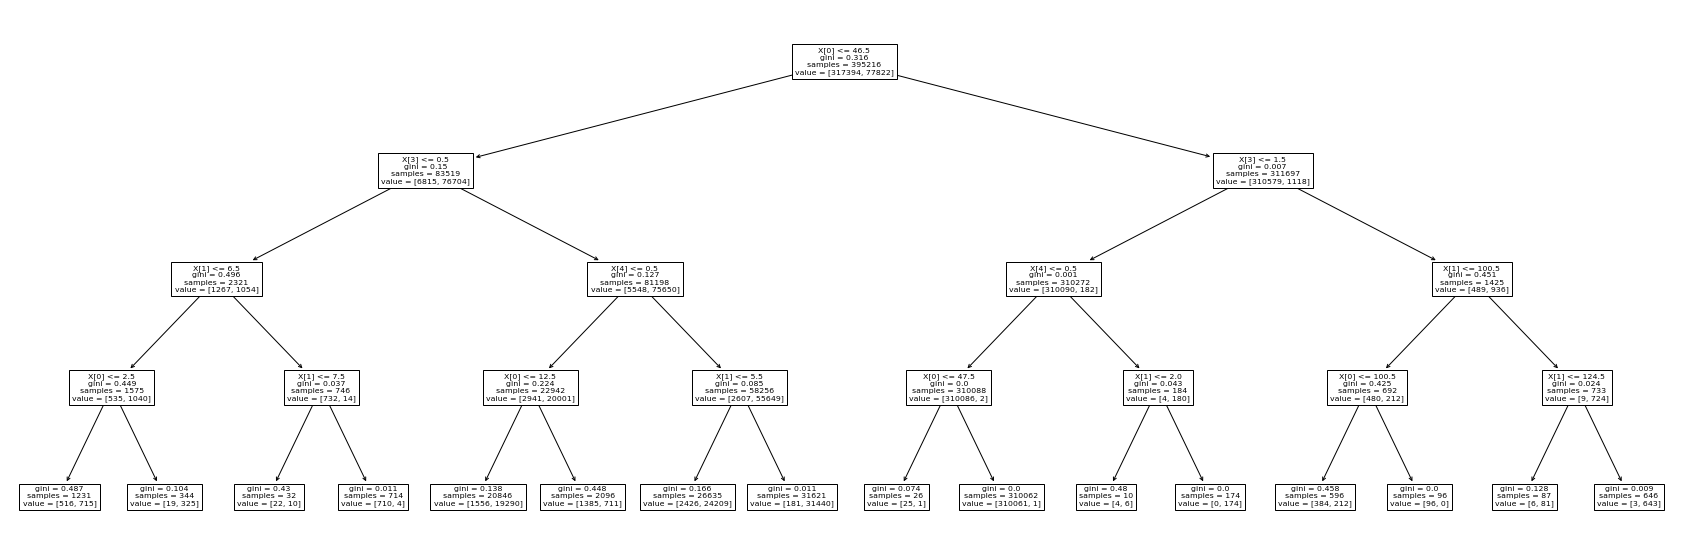

In [51]:
from sklearn import tree
import matplotlib.pyplot

tree.plot_tree(arbol.fit(X_train, y_train))

CONSIGNA:

1. Usando las variables más relevantes y separando los datos en "train" y "test", utilizar un árbol de decisión para realizar la predicción sobre que tipo de conexión es pero teniendo en cuenta todas las posibles:

In [52]:
#X = df_conexiones[['count','dst_host_count','srv_count','dst_host_same_src_port_rate','dst_host_srv_serror_rate','dst_host_srv_diff_host_rate','same_srv_rate','srv_diff_host_rate','protocol_type_le','logged_in']]
X = df_conexiones[['protocol_type_le','service_le','srv_count','dst_host_same_src_port_rate']]
y = df_conexiones[['labels_le2']]

In [53]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth = 4)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [55]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [56]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = arbol.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = arbol.predict(X_test)

# Comaparamos con las etiquetas reales
print('Porcentaje de aciertos sobre el conjunto de Entrenamiento:', accuracy_score(y_train_pred,y_train))
print('Porcentaje de aciertos sobre el conjunto de Evaluación:', accuracy_score(y_test_pred,y_test))

Porcentaje de aciertos sobre el conjunto de Entrenamiento: 0.9739939678555524
Porcentaje de aciertos sobre el conjunto de Evaluación: 0.9739385658620515


[Text(0.6363636363636364, 0.9, 'X[2] <= 321.0\ngini = 0.591\nsamples = 395216\nvalue = [1762, 24, 6, 42, 10, 998, 17, 7, 6, 85761, 185\n77822, 2, 3, 211, 832, 8, 1271, 224632, 2, 783\n816, 16]'),
 Text(0.36363636363636365, 0.7, 'X[1] <= 40.5\ngini = 0.54\nsamples = 170825\nvalue = [1762, 24, 6, 42, 10, 998, 17, 7, 6, 85761, 185\n77805, 2, 3, 211, 832, 8, 1271, 258, 2, 783, 816\n16]'),
 Text(0.18181818181818182, 0.5, 'X[0] <= 0.5\ngini = 0.218\nsamples = 71866\nvalue = [1762, 9, 6, 0, 10, 928, 17, 4, 4, 3065, 82\n63436, 0, 3, 206, 234, 5, 1005, 258, 0, 0, 816\n16]'),
 Text(0.09090909090909091, 0.3, 'X[1] <= 13.5\ngini = 0.691\nsamples = 2051\nvalue = [0, 0, 0, 0, 0, 914, 0, 0, 0, 0, 80, 591, 0\n0, 206, 1, 0, 1, 258, 0, 0, 0, 0]'),
 Text(0.045454545454545456, 0.1, 'gini = 0.449\nsamples = 1302\nvalue = [0, 0, 0, 0, 0, 912, 0, 0, 0, 0, 79, 310, 0\n0, 0, 0, 0, 1, 0, 0, 0, 0, 0]'),
 Text(0.13636363636363635, 0.1, 'gini = 0.665\nsamples = 749\nvalue = [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 281, 0

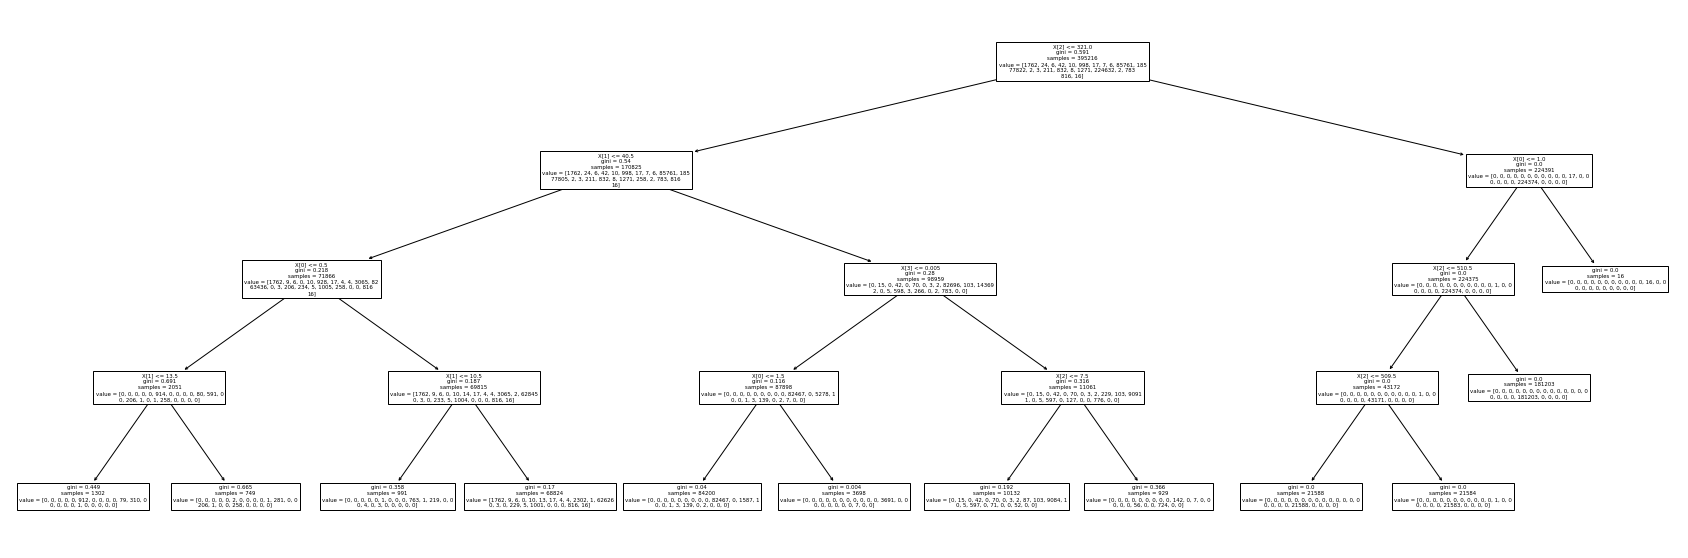

In [57]:
from sklearn import tree
import matplotlib.pyplot

tree.plot_tree(arbol.fit(X_train, y_train))

**Ejercicio 3**

CONSIGNA:

1. Con el modelo del ejercicio 3, realizar esta vez una validación cruzada.
2. Mostrar la curva de validación

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
arbol_scores = cross_val_score(arbol, X, y, cv=10)

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [60]:
print("Accuracy para el árbol: %0.2f (+/- %0.2f)" % (arbol_scores.mean(), arbol_scores.std() * 2))

Accuracy para el árbol: 0.97 (+/- 0.01)


In [61]:
from sklearn.model_selection import cross_validate

In [62]:
arbol_scores = cross_validate(arbol, X, y, cv=10, scoring = ['accuracy'])

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [63]:
print(arbol_scores)

{'fit_time': array([0.11064935, 0.1302681 , 0.12123728, 0.11459947, 0.11560678,
       0.10261822, 0.18097401, 0.12087917, 0.10055995, 0.1508193 ]), 'score_time': array([0.00699925, 0.00977397, 0.00799203, 0.00853086, 0.00856018,
       0.00922346, 0.00800109, 0.00700068, 0.00916076, 0.00946927]), 'test_accuracy': array([0.97417161, 0.97894822, 0.97765273, 0.96925226, 0.97127647,
       0.97483908, 0.97398891, 0.9691308 , 0.96880693, 0.9754261 ])}


In [64]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,15,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=2, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

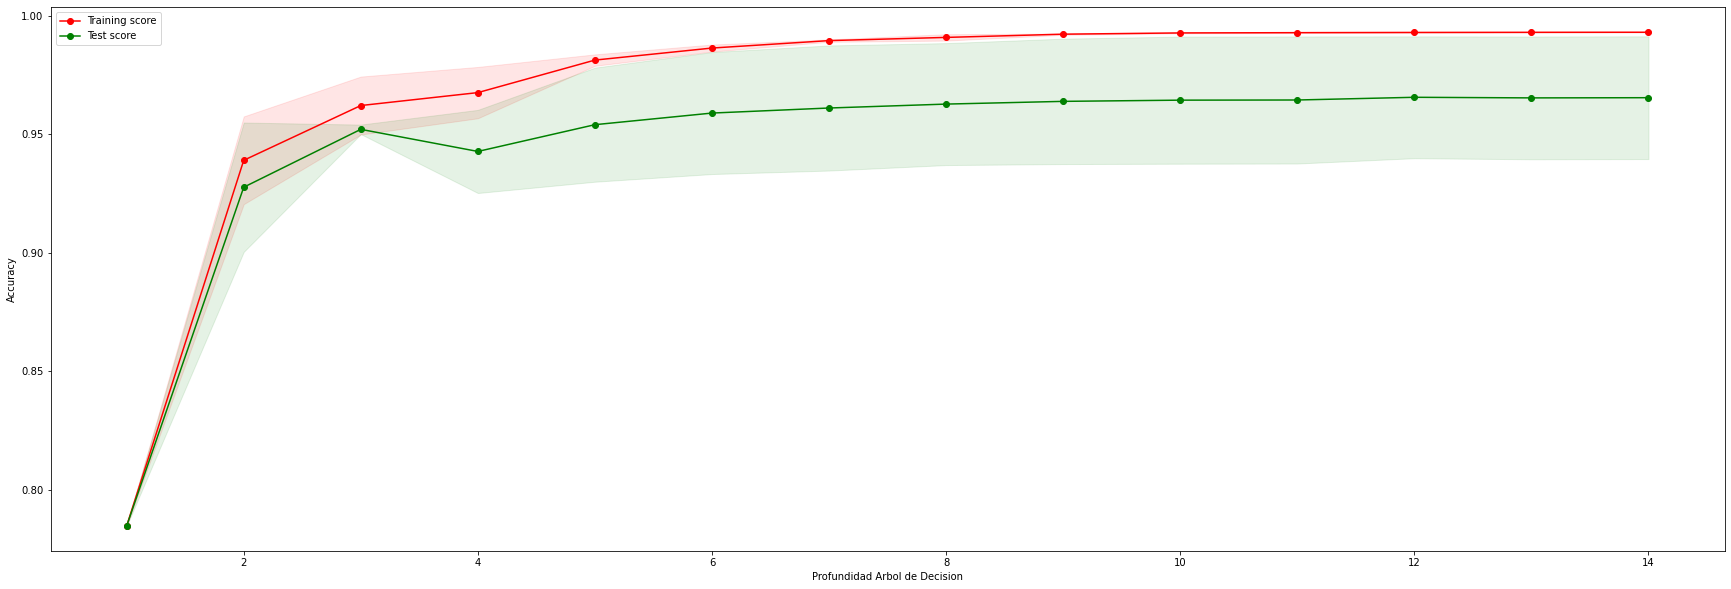

In [65]:
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

3. Aplicar GridSearch

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,3,4,5,6,7,8]}#, 'min_samples_split':[0.05,0.10], 'min_samples_leaf':[0.05,0.10]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, scoring = 'accuracy')#precision#recall

In [68]:
clf.fit(X_train, y_train)

C:\Users\lopez\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='accuracy')

In [69]:
y_pred = clf.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Test:', accuracy_score(y_pred,y_test))

Accuracy sobre conjunto de Test: 0.9910834471939679


In [70]:
scores_df = pd.DataFrame(clf.cv_results_)
scores_df.sort_values('rank_test_score',ascending=True).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.118904,0.006909,0.013711,0.000616,entropy,8,"{'criterion': 'entropy', 'max_depth': 8}",0.991359,0.991473,0.991157,0.991169,0.991106,0.991253,0.000140,1
6,0.113954,0.009313,0.014312,0.001375,gini,8,"{'criterion': 'gini', 'max_depth': 8}",0.989955,0.989752,0.989626,0.989904,0.989335,0.989714,0.000222,2
12,0.114795,0.004025,0.014177,0.001209,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.989727,0.989677,0.989069,0.989398,0.989120,0.989398,0.000273,3
5,0.124089,0.005929,0.013969,0.001717,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.988209,0.988044,0.987804,0.988184,0.987564,0.987961,0.000245,4
11,0.116126,0.008321,0.014506,0.001722,entropy,6,"{'criterion': 'entropy', 'max_depth': 6}",0.986134,0.985603,0.985147,0.985919,0.984945,0.985550,0.000449,5
4,0.109140,0.007650,0.013757,0.000664,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.984970,0.984705,0.984629,0.984679,0.984211,0.984639,0.000245,6
10,0.100888,0.002559,0.013343,0.000841,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.979657,0.979960,0.979733,0.979328,0.979087,0.979553,0.000309,7
3,0.106910,0.005549,0.013856,0.001217,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.977873,0.978252,0.978227,0.977569,0.977873,0.977959,0.000255,8
2,0.115244,0.024173,0.014465,0.003167,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.974280,0.974242,0.973723,0.974014,0.973698,0.973991,0.000247,9
9,0.100056,0.003697,0.014685,0.001779,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.972901,0.972800,0.972332,0.972736,0.972116,0.972577,0.000301,10


In [71]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [72]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 8}